# Task 19 - Practical Task

The objective of this task is to create a classifier that will predict whether an iris belongs to the ‘Iris-setosa' class or not.

### Import all the required libraries

In [311]:
# Import Libraries
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#sci-kit learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Load the dataset and verify few observations

In [312]:
# Read the CSV file and load it as dataframe
df = pd.read_csv("Iris.csv")

In [313]:
# Display first few observations
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### EDA

In [314]:
# Display the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Looking at the above details Species column is of object type. For logistic regression, we need to encode the values present in this column for further processing.

In [315]:
# Check for NANs in the dataset
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Looking at above stats, there are no null values present in the dataframe

In [316]:
# Display unique values in 'species' column to understand its distribution
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We have 3 species listed in the dataset. we need to encode this categorical data during preprocessing stage as per the given requirement.

### Data preprocessing

In [317]:
# Display the column headings
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [318]:
# Display unique values in 'species' column to understand its distribution
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [319]:
# Check the count of each species
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Here our target variable is Species. But we need to convert this object type to numeric categorical independent variable.

Now we will create a new column for the independent variable Species and encode the values present in the species column such that ‘Iris-setosa' is encoded  as 0, and 'Iris-versicolour' and 'Iris-virginica' are both encoded as 1. (0 corresponds to the 'Iris-setosa' class, and 1 corresponds to the not-‘Iris-setosa' class.)

In [320]:
# Take a copy of dataframe for 2nd iteration
# Check the value counts before encoding species in the copy of the dataframe
df_copy = df
df_copy['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [321]:
# Need to encode categorical variable Species
df_copy['Target'] = df_copy['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 1})
df_copy.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [322]:
# Check the value counts of Target after encoding
df_copy['Target'].value_counts()

Target
1    100
0     50
Name: count, dtype: int64

In [323]:
# Now create a new dataframe with only the required columns
df_copy = df_copy.drop(columns = ["Id","Species"])

In [324]:
# Check first few observations
df_copy.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [325]:
# Get the general stats from the new dataset
df_copy.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,0.666667
std,0.828066,0.433594,1.764420,0.763161,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000


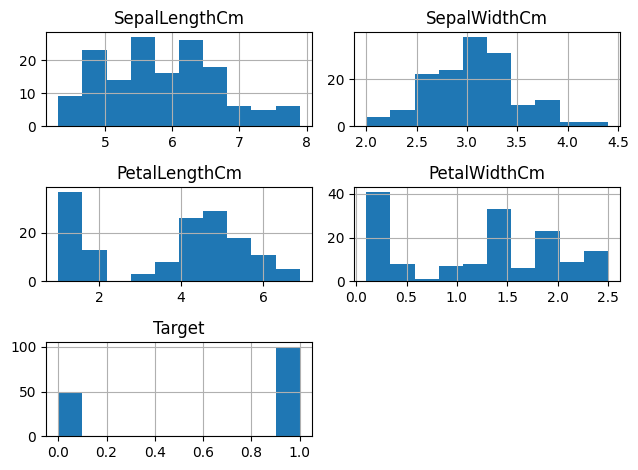

In [326]:
# Check the distribution of observations
#plt.figure(figsize=(15, 15))
df_copy.hist()
plt.tight_layout()
#plt.show()

In [327]:
# Quantify the correlation and view the heatmap
corr_matrix = df_copy.iloc[:, :-1].corr()
corr_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


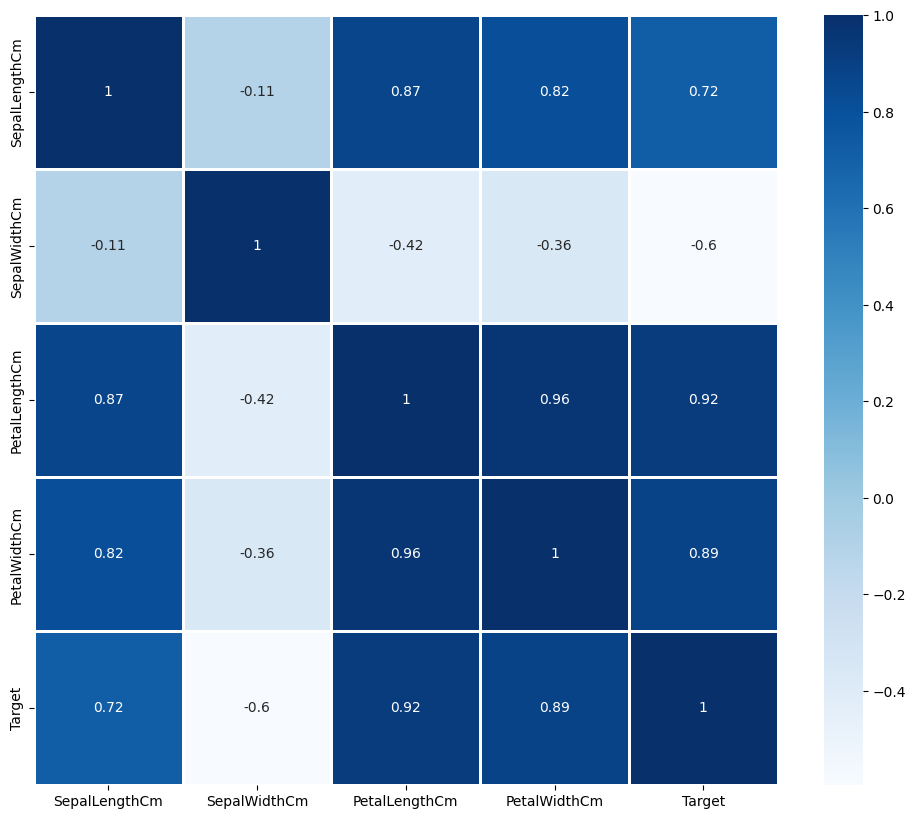

In [328]:
# Plot the heatmap to visualize feature correlations
plt.figure(figsize=(12, 10))
sns.heatmap(df_copy.corr(), annot=True, cmap='Blues', linewidths=2)
plt.show()

<Axes: >

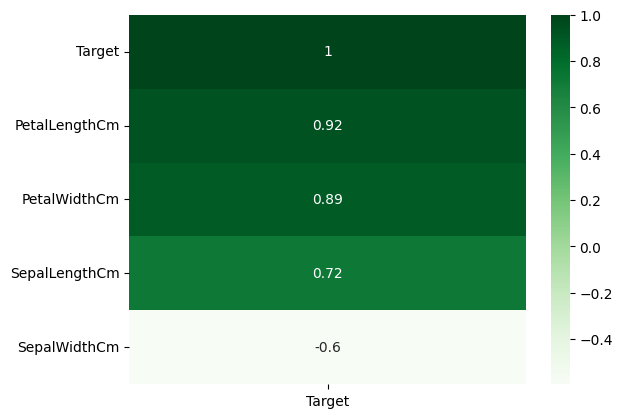

In [329]:
# Now we will check the correlation sorted by Target variable
corr = df_copy.corr()[['Target']].sort_values(by='Target', ascending=False)
sns.heatmap(corr, annot=True, cmap='Greens')

As we can see from the above heatmap, Petal Length, Petal Width have strong positive correlation, whereas Sepal Length and Sepal Width have got moderate positive/negative correlation. We will consider these dependent variables as features.

In [330]:
# Splitting the dataset into features and target
X = df_copy.drop('Target', axis=1).values
y = df_copy['Target'].values

### Train & Test set split

In [331]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Implementing Logistic Regression model

In [332]:
# Initialize the Logistic regression model
log_reg = LogisticRegression()

#Fit the logistic regression model
log_reg.fit(X_train, y_train)


LogisticRegression()

In [333]:
# let see the coefficeitn and intercept
print("Coefficeint : ", log_reg.coef_)
print("intercept : ", log_reg.intercept_)


Coefficeint :  [[ 0.43705364 -0.78811429  2.18994723  0.91184732]]
intercept :  [-6.55172492]


In [334]:
X_test.shape

(38, 4)

In [335]:
y_pred = log_reg.predict(X_test).reshape(-1,1)

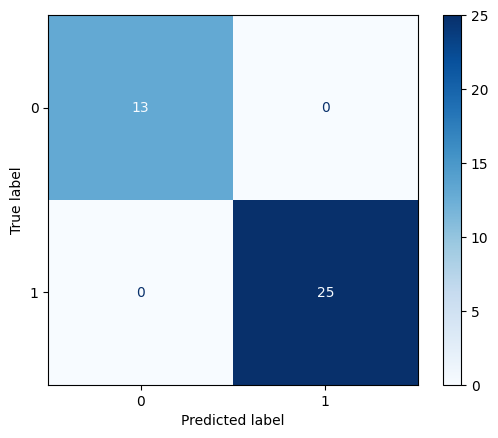

In [336]:
# Heatmap for confusion matrix using scikit-learn
cm = confusion_matrix(y_pred, y_test, labels=log_reg.classes_)

# sns.heatmap to get the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=log_reg.classes_)
disp.plot(cmap = 'Blues')

In [337]:
# Print the confusion matrix
cm

array([[13,  0],
       [ 0, 25]], dtype=int64)

Now evaluate the performance of the model by calculating the  accuracy, precision, and recall with the values from the confusion matrix above.

In [338]:
# Calculate Accuracy
accu_score = (cm[0,0] + cm[1,1]) / cm.sum()
print('Accuracy: {}'.format(accu_score))

Accuracy: 1.0


In [339]:
# Calculate Accuracy
accu_score = (cm[0,0] + cm[1,1]) / cm.sum()
print('Accuracy: {}'.format(accu_score))

Accuracy: 1.0


In [340]:
# Calculate Precision with True positive & False positive from confusion matrix values
precision = cm[0,0] / (cm[0,:].sum())
print('Precision: {}'.format(precision))

Precision: 1.0


In [341]:
# Calculate Recall with True positive & False negative from confusion matrix values
recall = cm[0,0] / (cm[:,0].sum())
print('Recall: {}'.format(recall))

Recall: 1.0


Looking at the above confusion matrix and other scores such as accuracy, precision, recall the model is likely to have a higher prediction as the predictions are matching with the actuals.

### Now, we will repeat this task to have all three categories ‘Iris-setosa', 'Iris-versicolour', and 'Iris-virginica' corresponding to the numeric values 0, 1, and 2 respectively. Then we will use sklearn’s logistic regression function to fit a model and make predictions on the test set.

In [342]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [343]:
# Need to encode categorical variable Species. This time we have to map all 3 species
df['Target'] = df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [344]:
# Check the target value counts for each mapped values
df["Target"].value_counts()

Target
0    50
1    50
2    50
Name: count, dtype: int64

In [345]:
# Splitting the dataset into features and target
X = df.drop(columns=['Id','Species','Target'],axis=1).values
y = df['Target'].values

### Train & Test set split

In [346]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Implementing Logistic Regression model

In [347]:
# Initialize the Logistic regression model
log_reg = LogisticRegression()

#Fit the logistic regression model
log_reg.fit(X_train, y_train)


LogisticRegression()

In [348]:
# let see the coefficeitn and intercept
print("Coefficeint : ", log_reg.coef_)
print("intercept : ", log_reg.intercept_)


Coefficeint :  [[-0.41433199  0.84895641 -2.33172697 -0.99067446]
 [ 0.52068484 -0.29387734 -0.21765519 -0.71283725]
 [-0.10635284 -0.55507906  2.54938216  1.70351171]]
intercept :  [  9.23919506   1.73879688 -10.97799194]


In [349]:
y_pred = log_reg.predict(X_test).reshape(-1,1)

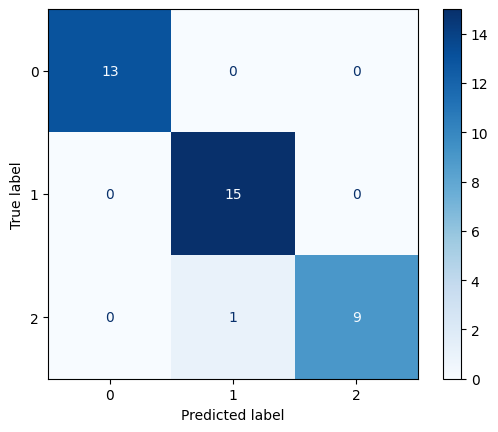

In [350]:
# Heatmap for confusion matrix using scikit-learn
cm = confusion_matrix(y_pred, y_test, labels=log_reg.classes_)

# sns.heatmap to get the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=log_reg.classes_)
disp.plot(cmap = 'Blues')

The above confustion matrix shows the actuals and predictions for all 3 classes of species. It shows that the one of the observation of virginica  has been misclassified under another class. So, the model is likely to have bit of less accuracy.

In [351]:
# Now we will use score method to get accuracy of model
score = log_reg.score(X_test, y_test)

print('Accuracy: {}'.format(score))

Accuracy: 0.9736842105263158


In [352]:
# Additionaly, we can evaluate the model by checking classification report metrics that covers precision, recall, F1 score 
print("Classification report : \n", classification_report(y_pred, y_test))

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        15
           2       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

